In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import torch


from PIL import Image
import torch
from torchvision import models, transforms
from sklearn.neighbors import NearestNeighbors
import os
import glob

import faiss

import clip
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Datasets

In [3]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from skimage import io, transform
import random

### AID

In [78]:
class AID(Dataset):

    def __init__(self, root_dir):

        self.label_map = {}
        self.info = []
        i = 0
        for root, dirs, files in os.walk(root_dir):
                
            for file in files:
                
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label.lower()))


                if label.lower() not in self.label_map:
                    self.label_map[label.lower()] = i
                    i += 1

        random.shuffle(self.info)
        self.transform = transform


    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = torch.tensor(io.imread(img_path)[:,:,:3], dtype=torch.float32)
        # img = img / 255.
        
        return img, label, img_path

In [79]:
dataset = AID('datasets/AID')
label_map = dataset.label_map

'''
# Parameters
batch_size = 32
validation_split = 0.2
shuffle_dataset = True
random_seed = 42
# Create train and validation splits
dataset_size = len(dataset)
val_size = int(validation_split * dataset_size)
train_size = dataset_size - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle_dataset)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
'''


class_map = {v: k for k, v in label_map.items()}

In [80]:
dataset = AID('datasets/AID')

In [81]:
label_map

{'viaduct': 0,
 'railwaystation': 1,
 'center': 2,
 'farmland': 3,
 'industrial': 4,
 'baseballfield': 5,
 'forest': 6,
 'sparseresidential': 7,
 'beach': 8,
 'port': 9,
 'desert': 10,
 'mountain': 11,
 'commercial': 12,
 'bareland': 13,
 'river': 14,
 'pond': 15,
 'stadium': 16,
 'meadow': 17,
 'school': 18,
 'airport': 19,
 'park': 20,
 'square': 21,
 'storagetanks': 22,
 'playground': 23,
 'parking': 24,
 'church': 25,
 'bridge': 26,
 'resort': 27,
 'denseresidential': 28,
 'mediumresidential': 29}

In [82]:
class_map

{0: 'viaduct',
 1: 'railwaystation',
 2: 'center',
 3: 'farmland',
 4: 'industrial',
 5: 'baseballfield',
 6: 'forest',
 7: 'sparseresidential',
 8: 'beach',
 9: 'port',
 10: 'desert',
 11: 'mountain',
 12: 'commercial',
 13: 'bareland',
 14: 'river',
 15: 'pond',
 16: 'stadium',
 17: 'meadow',
 18: 'school',
 19: 'airport',
 20: 'park',
 21: 'square',
 22: 'storagetanks',
 23: 'playground',
 24: 'parking',
 25: 'church',
 26: 'bridge',
 27: 'resort',
 28: 'denseresidential',
 29: 'mediumresidential'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


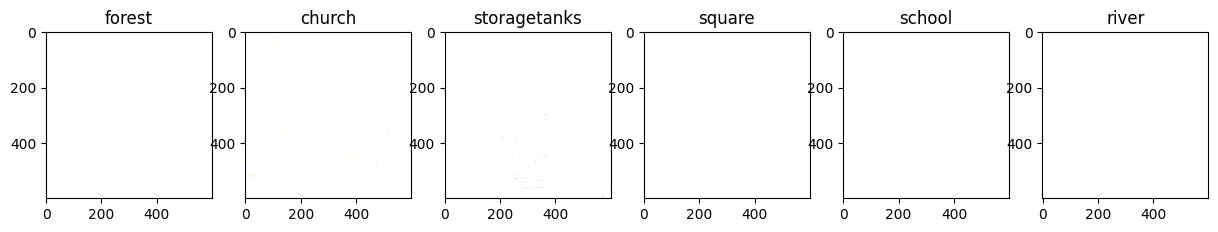

In [83]:
n = 6
fig, axs = plt.subplots(1, n, figsize=(15, 5)) 

for i in range(n):
    img, label, _ = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

### FAIR1M

In [ ]:
class FAIR1M(Dataset):

    def __init__(self, root_dir, transform=None):

        self.label_map = {
            'ship': 0,
            'airplane': 1,
            'neighborhood': 2,
        }

        self.info = []
        for root, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label))

        random.shuffle(self.info)
        self.transform = transform

    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = io.imread(img_path)[:,:,:3]
        img = img / 255.
        
        return img, label

In [ ]:
dataset = FAIR1M('datasets/FAIR1M_partial')


'''
# Parameters
batch_size = 32
validation_split = 0.2
shuffle_dataset = True
random_seed = 42
# Create train and validation splits
dataset_size = len(dataset)
val_size = int(validation_split * dataset_size)
train_size = dataset_size - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle_dataset)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
'''


class_map = {
    0: 'ship',
    1: 'airplane',
    2: 'neighborhood',
}

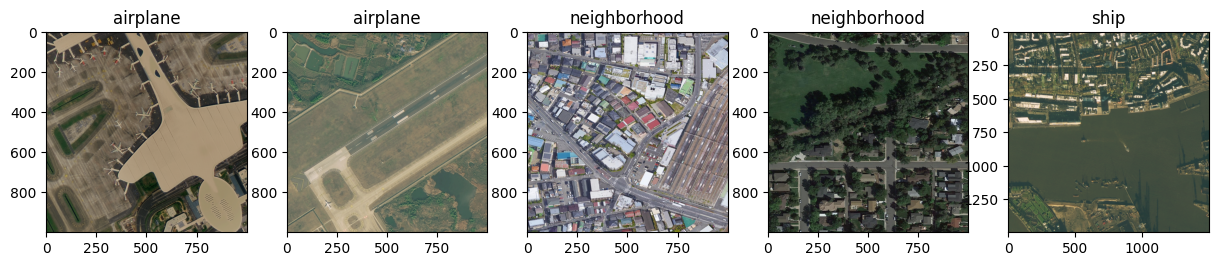

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5)) 

for i in range(5):
    img, label = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

### RESISC45

In [ ]:
class RESISC45(Dataset):

    def __init__(self, root_dir, transform=None):

        self.label_map = {
            'ship': 0,
            'airplane': 1,
            'bridge': 2,
        }

        self.info = []
        for root, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label))

        random.shuffle(self.info)
        self.transform = transform

    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = io.imread(img_path)[:,:,:3]
        img = img / 255.
        
        return img, label

In [ ]:
dataset = RESISC45('datasets/RESISC45_partial')

In [ ]:
class_map = {
    0: 'ship',
    1: 'airplane',
    2: 'neighborhood',
}

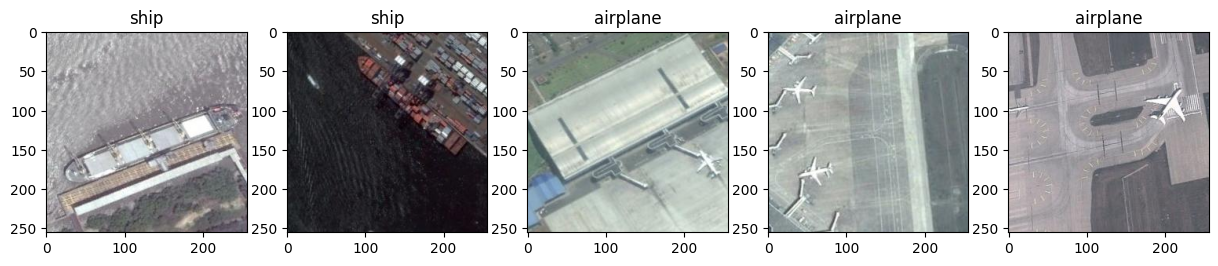

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5)) 

for i in range(5):
    img, label = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

### Sentinel-2 ship

In [ ]:
class SS2(Dataset):

    def __init__(self, root_dir, transform=None):

        self.label_map = {
            'ship': 0,
            'noship': 1,
        }

        self.info = []
        for root, dirs, files in os.walk(root_dir):
            for file in files:
                if file.endswith((".jpg", ".tif", ".png", "jpeg")):
                    file_path = os.path.join(root, file)
                    label = root.split('/')[-1]
                    self.info.append((file_path, label))

        random.shuffle(self.info)
        self.transform = transform

    def map_labels(self, label):
        return self.label_map[label]





    def __len__(self):
        return len(self.info)


    def __getitem__(self, idx):
        img_path, label = self.info[idx]

        label = self.map_labels(label.lower())

        img = io.imread(img_path)[:,:,:3]
        img = img / 255.
        
        return img, label

In [ ]:
dataset = SS2('datasets/Sentinel2_partial')

In [ ]:
class_map = {
    0: 'ship',
    1: 'noship',
}

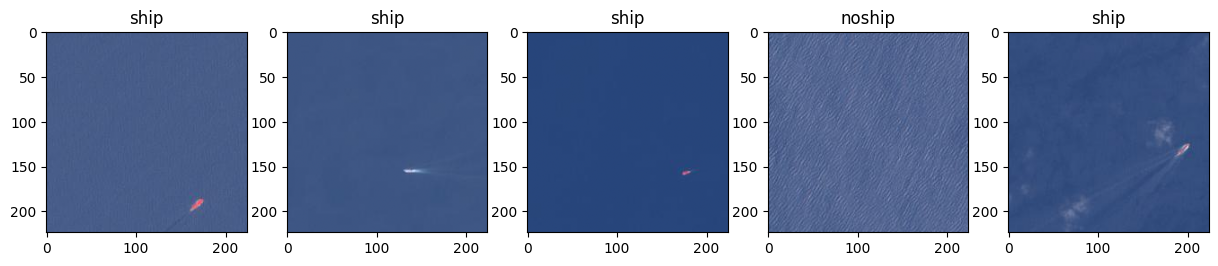

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5)) 

for i in range(5):
    img, label = dataset[i]
    label = class_map[label]

    axs[i].imshow(img)
    axs[i].set_title(label)

# Models
- https://pytorch.org/vision/stable/models.html
- load your neural netwrok for feature extraction

### Swin

In [6]:
# Swin
from torchvision.models import swin_v2_b, Swin_B_Weights

model = models.swin_v2_b(weights=Swin_B_Weights).to(device).eval()

total_params = '{:,}'.format(sum(p.numel() for p in model.parameters()))
total_params

'87,930,848'

In [ ]:
model

### ResNet

In [35]:
# ResNet

from torchvision.models import resnet50, ResNet50_Weights
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2).to(device).eval()
# model = models.resnet50(pretrained=True)


total_params = '{:,}'.format(sum(p.numel() for p in model.parameters()))
total_params

'25,557,032'

In [ ]:
model

### RegNet

In [8]:
# RegNet

model = models.regnet_y_400mf(pretrained=True).to(device).eval()

total_params = '{:,}'.format(sum(p.numel() for p in model.parameters()))
total_params

/home/amir/miniconda3/envs/faiss/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/amir/miniconda3/envs/faiss/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RegNet_Y_400MF_Weights.IMAGENET1K_V1`. You can also use `weights=RegNet_Y_400MF_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


'4,344,144'

In [10]:
model

RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 48, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 48, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=6, bias=False)
            

# Metrics

In [ ]:
def accuracy(query_label, neighbors, labels):
    t, f = 0, 0
    for i in neighbors:
        if query_label == labels[i]:
            t += 1
        else:
            f += 1
    return '{:.1%}'.format(t / (t + f))

# Vector Database
- Store features in the VD
- I use FAISS

## Store in basic Python List

In [108]:
features = []
image_paths = []
labels = []
for x, y, img_path in dataset:
    img = x.permute(2, 0, 1).unsqueeze(0)
    
    with torch.no_grad():
        feature = model(img.to(device)).detach().cpu().numpy()

    features.append(feature)
    image_paths.append(img_path)
    labels.append(y)


features = np.concatenate(features, axis=0)

**Swin**
- took


**ResNet**  
- Took 3m 20s for AID on NVIDIA 300

### NN Search

In [153]:
id = random.randint(0, len(dataset))
img, label, img_path = dataset[id]
img = img.permute(2, 0, 1).unsqueeze(0)

query_image_path = img_path
query_label = label

with torch.no_grad():
    query_feature = model(img.to(device)).detach().cpu().numpy()

In [154]:
k = 20

neigh = NearestNeighbors(n_neighbors=k+1, algorithm='brute')
neigh.fit(features)
distances, indices = neigh.kneighbors(query_feature)

In [156]:
accuracy(query_label, indices[0], labels)

'47.6%'

In [130]:
# Print the results
for i in range(k):
    print(f"Image {i+1}:")
    print(f"Distance: {distances[0][i]:.4f}")
    print(f"Index: {indices[0][i]}")
    print(f"Image Path: {image_paths[indices[0][i]]}")
    print()

Image 1:
Distance: 0.0000
Index: 3451
Image Path: datasets/AID/Forest/forest_55.jpg

Image 2:
Distance: 71.6672
Index: 2357
Image Path: datasets/AID/Forest/forest_112.jpg

Image 3:
Distance: 76.3390
Index: 1776
Image Path: datasets/AID/Forest/forest_110.jpg

Image 4:
Distance: 80.2472
Index: 3301
Image Path: datasets/AID/Forest/forest_118.jpg

Image 5:
Distance: 80.9759
Index: 8588
Image Path: datasets/AID/Forest/forest_147.jpg

Image 6:
Distance: 85.6833
Index: 4153
Image Path: datasets/AID/Forest/forest_84.jpg

Image 7:
Distance: 86.4543
Index: 9696
Image Path: datasets/AID/Forest/forest_130.jpg

Image 8:
Distance: 90.1400
Index: 8726
Image Path: datasets/AID/Forest/forest_100.jpg

Image 9:
Distance: 91.0603
Index: 430
Image Path: datasets/AID/Forest/forest_72.jpg

Image 10:
Distance: 91.2314
Index: 8842
Image Path: datasets/AID/Forest/forest_33.jpg

Image 11:
Distance: 91.5503
Index: 5165
Image Path: datasets/AID/Park/park_63.jpg

Image 12:
Distance: 91.7747
Index: 7224
Image Path: 

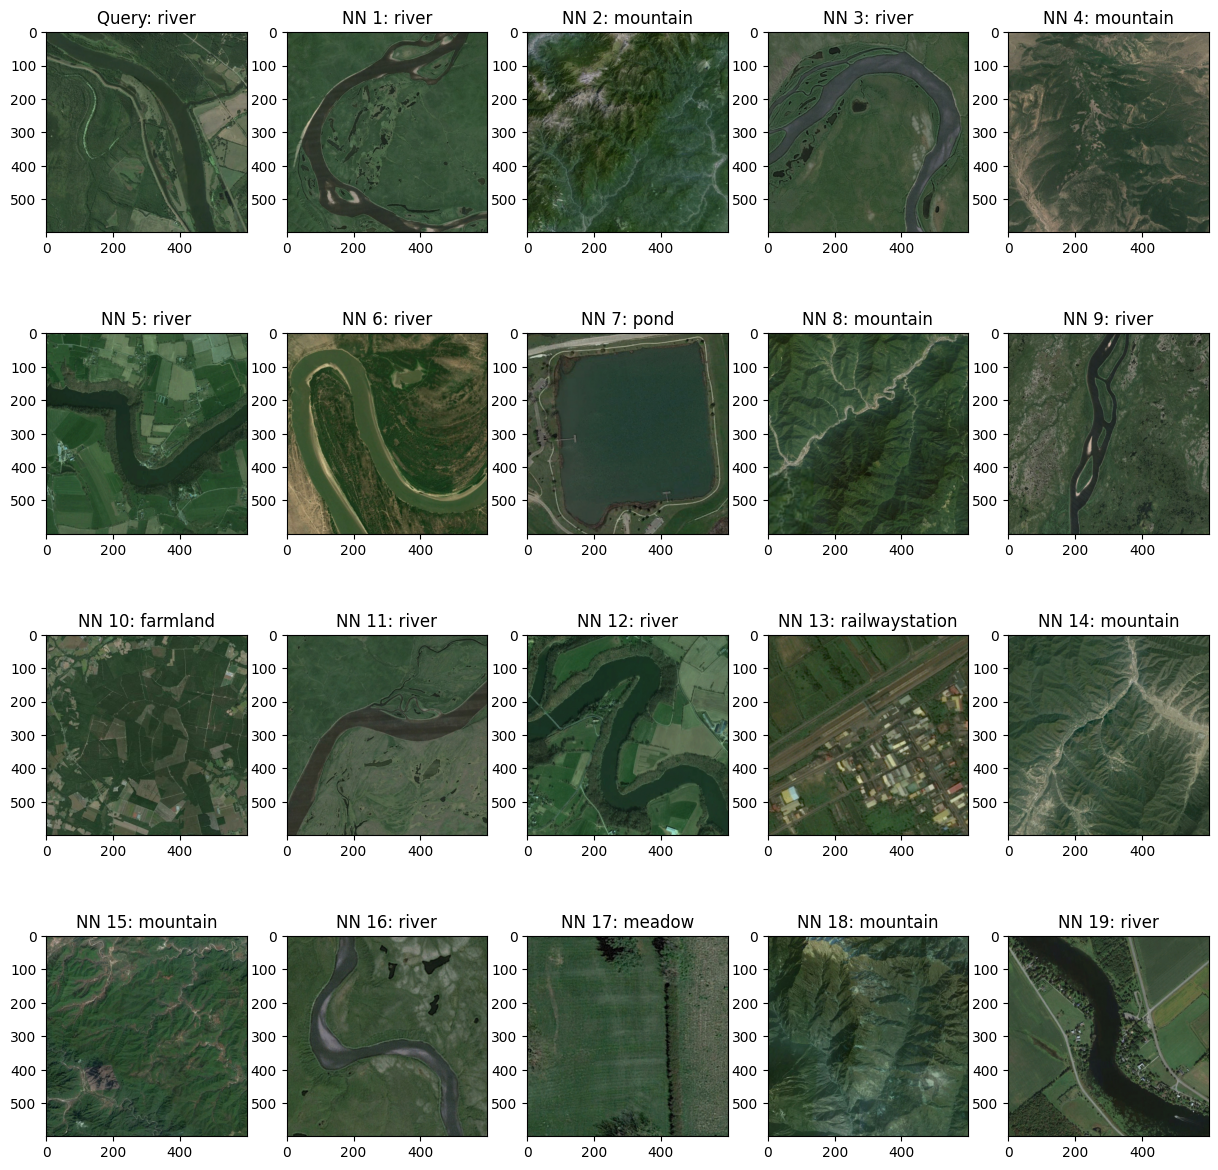

In [157]:
# Plot query image
query_image = Image.open(query_image_path)

rows, columns = 4, 5
fig, axs = plt.subplots(rows, columns, figsize=(15, 15))


n = 0
for i in range(rows):
    for j in range(columns):
        if (i == 0) and (j == 0):
            axs[0][0].imshow(query_image)
            axs[0][0].set_title(f'Query: {class_map[query_label]}')
        else:
            axs[i][j].imshow(Image.open(image_paths[indices[0][n+1]]))
            axs[i][j].set_title(f'NN {n+1}: {class_map[labels[indices[0][n+1]]]}')
            n += 1
plt.show()

## Store in FAISS Index
- https://github.com/facebookresearch/faiss/wiki/Getting-started

In [11]:
d = 1000
index = faiss.IndexFlatL2(d)
print(index.is_trained)

True


In [12]:
# Walk into directoies to find images and convert them to vectors
image_paths = []
for root, dirs, files in os.walk('datasets/'):
    for file in files:
        if file.endswith((".jpg", ".tif", ".png")):
            file_path = os.path.join(root, file)
            image_paths.append(file_path)

            img = torch.tensor(np.array(Image.open(file_path)), dtype=torch.float32)[:,:,:3]
            img = img.permute(2, 0, 1).unsqueeze(0)

            with torch.no_grad():
                feature = model(img.to(device)).detach().cpu().numpy()
            index.add(feature)

print(index.ntotal, ' Images Found!')

5071  Images Found!


### Search

In [13]:
query_image_path = 'datasets/RESISC45_partial/ship/ship_608.jpg'
query = torch.tensor(np.array(Image.open(query_image_path)), dtype=torch.float32)[:,:,:3]
query = query.permute(2, 0, 1).unsqueeze(0)
with torch.no_grad():
    query_feature = model(query.to(device)).detach().cpu().numpy()

In [14]:
k = 20
D, I = index.search(query_feature, k)

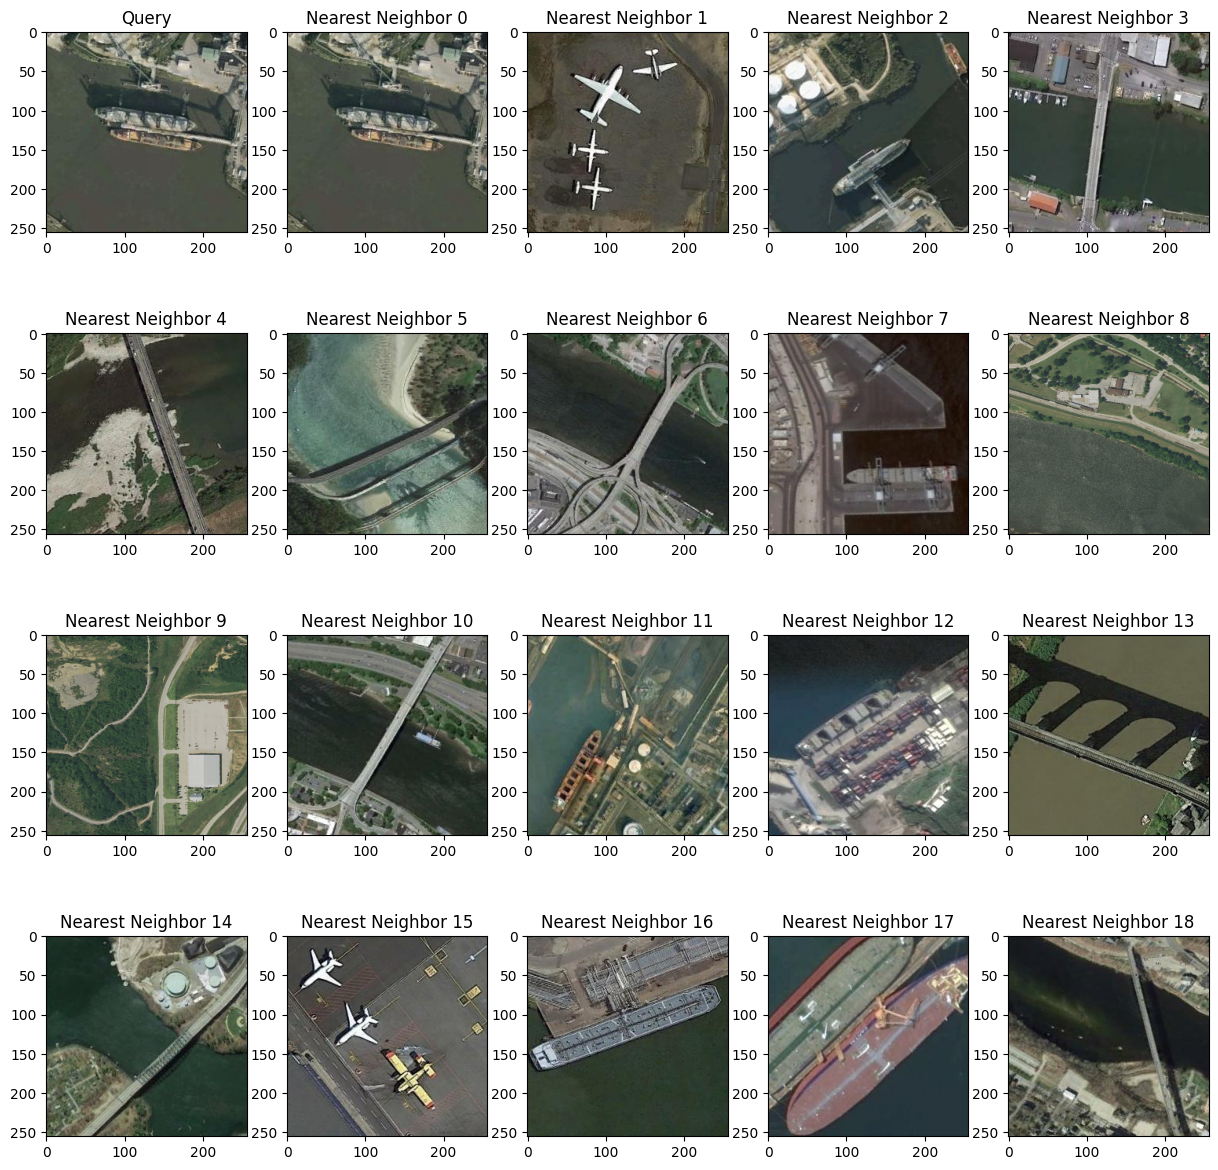

In [16]:
# Plot query image
query_image = Image.open(query_image_path)

rows, columns = 4, 5
fig, axs = plt.subplots(rows, columns, figsize=(15, 15))


n = 0
for i in range(rows):
    for j in range(columns):
        if (i == 0) and (j == 0):
            axs[0][0].imshow(query_image)
            axs[0][0].set_title(f'Query')
        else:
            axs[i][j].imshow(Image.open(image_paths[I[0][n]]))
            axs[i][j].set_title(f'Nearest Neighbor {n}')
            n += 1
plt.show()